In [1]:
# 1. 加载路透社数据集：
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data.shape

(8982,)

In [3]:
train_labels.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
test_labels.shape

(2246,)

In [6]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
# 2. 数据预处理：
import numpy as np

def one_hot_encode(docs, dim=10000):
    docs_encoded = np.zeros((len(docs), dim), dtype='float16')
    for i, doc in enumerate(docs):
        docs_encoded[i, doc] = 1
    return docs_encoded

# 将输入数据向量化：
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

# 将标签数据向量化：
t_train = one_hot_encode(train_labels, dim=46)
t_test = one_hot_encode(test_labels, dim=46)

x_train.shape

(8982, 10000)

In [8]:
x_test.shape

(2246, 10000)

In [9]:
t_train.shape

(8982, 46)

In [10]:
t_test.shape

(2246, 46)

In [11]:
# 3. 构建网络：

# 构建一个具有10000个输入，两个各有64个神经元的隐藏层
# 以及以softmax作为激活函数的输出层的网络：
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0428 22:13:35.837108 22928 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



W0428 22:13:35.875108 22928 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



W0428 22:13:35.882103 22928 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
# 4. 编译模型：

# 由于要解决的是一个多分类问题，因此损失函数应该使用分类交叉熵：
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='rmsprop')

W0428 22:13:36.769106 22928 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



W0428 22:13:36.809109 22928 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
# 5. 留出验证集：
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = t_train[:1000]
partial_y_train = t_train[1000:]

In [14]:
# 6. 训练模型：
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0428 22:13:39.568105 22928 deprecation.py:323] From G:\Python\fakeras\venv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W0428 22:13:39.704105 22928 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20


 512/7982 [>.............................] - ETA: 5s - loss: 3.8035 - acc: 0.0898

1024/7982 [==>...........................] - ETA: 2s - loss: 3.7253 - acc: 0.2539

1536/7982 [====>.........................] - ETA: 2s - loss: 3.6166 - acc: 0.3040



2048/7982 [======>.......................] - ETA: 1s - loss: 3.5038 - acc: 0.3330



2560/7982 [========>.....................] - ETA: 1s - loss: 3.3865 - acc: 0.3605



3072/7982 [==========>...................] - ETA: 1s - loss: 3.2659 - acc: 0.3932



3584/7982 [============>.................] - ETA: 0s - loss: 3.1765 - acc: 0.4093



4096/7982 [==============>...............] - ETA: 0s - loss: 3.0838 - acc: 0.4229

4608/7982 [================>.............] - ETA: 0s - loss: 2.9931 - acc: 0.4347

5120/7982 [==================>...........] - ETA: 0s - loss: 2.9026 - acc: 0.4467

5632/7982 [====================>.........] - ETA: 0s - loss: 2.8255 - acc: 0.4531

6144/7982 [======================>.......] - ETA: 0s - loss: 2.7499 - acc: 0.4614



6656/7982 [========================>.....] - ETA: 0s - loss: 2.6779 - acc: 0.4727



7168/7982 [=========================>....] - ETA: 0s - loss: 2.6174 - acc: 0.4814



7680/7982 [===========================>..] - ETA: 0s - loss: 2.5629 - acc: 0.4910

7982/7982 [==============================] - 1s 179us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120


Epoch 2/20


 512/7982 [>.............................] - ETA: 0s - loss: 1.5152 - acc: 0.6836

1024/7982 [==>...........................] - ETA: 0s - loss: 1.5690 - acc: 0.6611

1536/7982 [====>.........................] - ETA: 0s - loss: 1.5477 - acc: 0.6680

2048/7982 [======>.......................] - ETA: 0s - loss: 1.5688 - acc: 0.6641

2560/7982 [========>.....................] - ETA: 0s - loss: 1.5509 - acc: 0.6711



3072/7982 [==========>...................] - ETA: 0s - loss: 1.5444 - acc: 0.6686



3584/7982 [============>.................] - ETA: 0s - loss: 1.5250 - acc: 0.6747



4096/7982 [==============>...............] - ETA: 0s - loss: 1.5113 - acc: 0.6770



4608/7982 [================>.............] - ETA: 0s - loss: 1.5074 - acc: 0.6771



5120/7982 [==================>...........] - ETA: 0s - loss: 1.4966 - acc: 0.6809

5632/7982 [====================>.........] - ETA: 0s - loss: 1.4803 - acc: 0.6829



6144/7982 [======================>.......] - ETA: 0s - loss: 1.4794 - acc: 0.6820

6656/7982 [========================>.....] - ETA: 0s - loss: 1.4690 - acc: 0.6839



7168/7982 [=========================>....] - ETA: 0s - loss: 1.4602 - acc: 0.6861

7680/7982 [===========================>..] - ETA: 0s - loss: 1.4515 - acc: 0.6871

7982/7982 [==============================] - 1s 128us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060


Epoch 3/20


 512/7982 [>.............................] - ETA: 1s - loss: 1.2179 - acc: 0.7285

1024/7982 [==>...........................] - ETA: 0s - loss: 1.2025 - acc: 0.7363



1536/7982 [====>.........................] - ETA: 0s - loss: 1.1966 - acc: 0.7441



2048/7982 [======>.......................] - ETA: 0s - loss: 1.1718 - acc: 0.7461



2560/7982 [========>.....................] - ETA: 0s - loss: 1.1366 - acc: 0.7566

3072/7982 [==========>...................]

 - ETA: 0s - loss: 1.1290 - acc: 0.7627



3584/7982 [============>.................] - ETA: 0s - loss: 1.1531 - acc: 0.7570



4096/7982 [==============>...............] - ETA: 0s - loss: 1.1423 - acc: 0.7581



4608/7982 [================>.............] - ETA: 0s - loss: 1.1257 - acc: 0.7602



5120/7982 [==================>...........] - ETA: 0s - loss: 1.1170 - acc: 0.7619



5632/7982 [====================>.........] - ETA: 0s - loss: 1.1130 - acc: 0.7624



6144/7982 [======================>.......] - ETA: 0s - loss: 1.1075 - acc: 0.7627

6656/7982 [========================>.....] - ETA: 0s - loss: 1.1032 - acc: 0.7635



7168/7982 [=========================>....] - ETA: 0s - loss: 1.1015 - acc: 0.7644



7680/7982 [===========================>..] - ETA: 0s - loss: 1.0968 - acc: 0.7647

7982/7982 [==============================] - 1s 141us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430


Epoch 4/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.8880 - acc: 0.8242

1024/7982 [==>...........................] - ETA: 1s - loss: 0.8614 - acc: 0.8232

1536/7982 [====>.........................] - ETA: 0s - loss: 0.9040 - acc: 0.8079



2048/7982 [======>.......................] - ETA: 0s - loss: 0.8927 - acc: 0.8159

2560/7982 [========>.....................] - ETA: 0s - loss: 0.8960 - acc: 0.8117



3072/7982 [==========>...................] - ETA: 0s - loss: 0.8877 - acc: 0.8145



3584/7982 [============>.................] - ETA: 0s - loss: 0.8853 - acc: 0.8158

4096/7982 [==============>...............]

 - ETA: 0s - loss: 0.8984 - acc: 0.8105

4608/7982 [================>.............] - ETA: 0s - loss: 0.9095 - acc: 0.8079



5120/7982 [==================>...........] - ETA: 0s - loss: 0.8947 - acc: 0.8115



5632/7982 [====================>.........] - ETA: 0s - loss: 0.8888 - acc: 0.8111



6144/7982 [======================>.......] - ETA: 0s - loss: 0.8799 - acc: 0.8135



6656/7982 [========================>.....] - ETA: 0s - loss: 0.8760 - acc: 0.8146

7168/7982 [=========================>....] - ETA: 0s - loss: 0.8764 - acc: 0.8145

7680/7982 [===========================>..] - ETA: 0s - loss: 0.8718 - acc: 0.8158



7982/7982 [==============================] - 1s 135us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590


Epoch 5/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.7680 - acc: 0.8320

1024/7982 [==>...........................] - ETA: 0s - loss: 0.7529 - acc: 0.8379

1536/7982 [====>.........................] - ETA: 0s - loss: 0.7555 - acc: 0.8411



2048/7982 [======>.......................] - ETA: 0s - loss: 0.7242 - acc: 0.8477

2560/7982 [========>.....................] - ETA: 0s - loss: 0.7099 - acc: 0.8488



3072/7982 [==========>...................] - ETA: 0s - loss: 0.7268 - acc: 0.8421

3584/7982 [============>.................] - ETA: 0s - loss: 0.7151 - acc: 0.8443

4096/7982 [==============>...............] - ETA: 0s - loss: 0.7101 - acc: 0.8459



4608/7982 [================>.............] - ETA: 0s - loss: 0.7096 - acc: 0.8451



5120/7982 [==================>...........] - ETA: 0s - loss: 0.7168 - acc: 0.8432

5632/7982 [====================>.........] - ETA: 0s - loss: 0.7127 - acc: 0.8441

6144/7982 [======================>.......] - ETA: 0s - loss: 0.7098 - acc: 0.8454

6656/7982 [========================>.....] - ETA: 0s - loss: 0.7105 - acc: 0.8451

7168/7982 [=========================>....] - ETA: 0s - loss: 0.7033 - acc: 0.8471



7680/7982 [===========================>..] - ETA: 0s - loss: 0.7056 - acc: 0.8458

7982/7982 [==============================] - 1s 136us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810


Epoch 6/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.6030 - acc: 0.8770

1024/7982 [==>...........................] - ETA: 0s - loss: 0.6032 - acc: 0.8740



1536/7982 [====>.........................] - ETA: 0s - loss: 0.5805 - acc: 0.8783



2048/7982 [======>.......................] - ETA: 0s - loss: 0.5748 - acc: 0.8813



2560/7982 [========>.....................] - ETA: 0s - loss: 0.5671 - acc: 0.8816

3072/7982 [==========>...................] - ETA: 0s - loss: 0.5716 - acc: 0.8796



3584/7982 [============>.................] - ETA: 0s - loss: 0.5652 - acc: 0.8817



4096/7982 [==============>...............] - ETA: 0s - loss: 0.5670 - acc: 0.8821



4608/7982 [================>.............] - ETA: 0s - loss: 0.5679 - acc: 0.8817



5120/7982 [==================>...........] - ETA: 0s - loss: 0.5657 - acc: 0.8809



5632/7982 [====================>.........] - ETA: 0s - loss: 0.5664 - acc: 0.8819



6144/7982 [======================>.......] - ETA: 0s - loss: 0.5653 - acc: 0.8810

6656/7982 [========================>.....] - ETA: 0s - loss: 0.5649 - acc: 0.8809



7168/7982 [=========================>....] - ETA: 0s - loss: 0.5676 - acc: 0.8797



7680/7982 [===========================>..] - ETA: 0s - loss: 0.5671 - acc: 0.8798

7982/7982 [==============================] - 1s 137us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040


Epoch 7/20
 512/7982 [>.............................] - ETA: 0s - loss: 0.4726 - acc: 0.9023

1024/7982 [==>...........................] - ETA: 0s - loss: 0.4714 - acc: 0.9062



1536/7982 [====>.........................] - ETA: 0s - loss: 0.4741 - acc: 0.9004

2048/7982 [======>.......................] - ETA: 0s - loss: 0.4834 - acc: 0.8984



2560/7982 [========>.....................] - ETA: 0s - loss: 0.4910 - acc: 0.8992



3072/7982 [==========>...................] - ETA: 0s - loss: 0.4768 - acc: 0.9020



3584/7982 [============>.................] - ETA: 0s - loss: 0.4655 - acc: 0.9035



4096/7982 [==============>...............] - ETA: 0s - loss: 0.4587 - acc: 0.9045

4608/7982 [================>.............] - ETA: 0s - loss: 0.4652 - acc: 0.9030



5120/7982 [==================>...........] - ETA: 0s - loss: 0.4656 - acc: 0.9047



5632/7982 [====================>.........] - ETA: 0s - loss: 0.4680 - acc: 0.9047



6144/7982 [======================>.......] - ETA: 0s - loss: 0.4649 - acc: 0.9046



6656/7982 [========================>.....] - ETA: 0s - loss: 0.4652 - acc: 0.9043



7168/7982 [=========================>....] - ETA: 0s - loss: 0.4637 - acc: 0.9043



7680/7982 [===========================>..] - ETA: 0s - loss: 0.4580 - acc: 0.9048

7982/7982 [==============================] - 1s 134us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


Epoch 8/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.3967 - acc: 0.9199

1024/7982 [==>...........................] - ETA: 0s - loss: 0.3959 - acc: 0.9189



1536/7982 [====>.........................] - ETA: 0s - loss: 0.3774 - acc: 0.9219



2048/7982 [======>.......................] - ETA: 0s - loss: 0.3787 - acc: 0.9233



2560/7982 [========>.....................] - ETA: 0s - loss: 0.3723 - acc: 0.9227

3072/7982 [==========>...................]

 - ETA: 0s - loss: 0.3740 - acc: 0.9238

3584/7982 [============>.................] - ETA: 0s - loss: 0.3715 - acc: 0.9247

4096/7982 [==============>...............] - ETA: 0s - loss: 0.3667 - acc: 0.9260



4608/7982 [================>.............] - ETA: 0s - loss: 0.3675 - acc: 0.9243

5120/7982 [==================>...........] - ETA: 0s - loss: 0.3717 - acc: 0.9242



5632/7982 [====================>.........] - ETA: 0s - loss: 0.3673 - acc: 0.9251

6144/7982 [======================>.......] - ETA: 0s - loss: 0.3701 - acc: 0.9240



6656/7982 [========================>.....] - ETA: 0s - loss: 0.3679 - acc: 0.9247



7168/7982 [=========================>....] - ETA: 0s - loss: 0.3665 - acc: 0.9252



7680/7982 [===========================>..] - ETA: 0s - loss: 0.3676 - acc: 0.9242



7982/7982 [==============================] - 1s 135us/step - loss: 0.3695 - acc: 0.9231 - val_loss: 0.9363 - val_acc: 0.7890


Epoch 9/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.3203 - acc: 0.9180

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2939 - acc: 0.9326

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2962 - acc: 0.9329



2048/7982 [======>.......................] - ETA: 0s - loss: 0.2824 - acc: 0.9380



2560/7982 [========>.....................] - ETA: 0s - loss: 0.2834 - acc: 0.9359



3072/7982 [==========>...................] - ETA: 0s - loss: 0.2904 - acc: 0.9346

3584/7982 [============>.................]

 - ETA: 0s - loss: 0.2963 - acc: 0.9328



4096/7982 [==============>...............] - ETA: 0s - loss: 0.3033 - acc: 0.9329



4608/7982 [================>.............] - ETA: 0s - loss: 0.3017 - acc: 0.9329



5120/7982 [==================>...........] - ETA: 0s - loss: 0.2996 - acc: 0.9332



5632/7982 [====================>.........] - ETA: 0s - loss: 0.2989 - acc: 0.9334

6144/7982 [======================>.......] - ETA: 0s - loss: 0.3045 - acc: 0.9315

6656/7982 [========================>.....] - ETA: 0s - loss: 0.3065 - acc: 0.9306

7168/7982 [=========================>....] - ETA: 0s - loss: 0.3056 - acc: 0.9314

7680/7982 [===========================>..] - ETA: 0s - loss: 0.3028 - acc: 0.9320

7982/7982 [==============================] - 1s 129us/step - loss: 0.3032 - acc: 0.9315 - val_loss: 0.8917 - val_acc: 0.8090


Epoch 10/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.2198 - acc: 0.9531

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2078 - acc: 0.9590



1536/7982 [====>.........................] - ETA: 0s - loss: 0.2250 - acc: 0.9492



2048/7982 [======>.......................] - ETA: 0s - loss: 0.2482 - acc: 0.9414



2560/7982 [========>.....................] - ETA: 0s - loss: 0.2498 - acc: 0.9402



3072/7982 [==========>...................] - ETA: 0s - loss: 0.2553 - acc: 0.9395



3584/7982 [============>.................] - ETA: 0s - loss: 0.2523 - acc: 0.9400



4096/7982 [==============>...............] - ETA: 0s - loss: 0.2549 - acc: 0.9402

4608/7982 [================>.............] - ETA: 0s - loss: 0.2540 - acc: 0.9410

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2498 - acc: 0.9416



5632/7982 [====================>.........] - ETA: 0s - loss: 0.2481 - acc: 0.9426



6144/7982 [======================>.......] - ETA: 0s - loss: 0.2463 - acc: 0.9425



6656/7982 [========================>.....] - ETA: 0s - loss: 0.2505 - acc: 0.9413



7168/7982 [=========================>....] - ETA: 0s - loss: 0.2534 - acc: 0.9408



7680/7982 [===========================>..] - ETA: 0s - loss: 0.2540 - acc: 0.9410



7982/7982 [==============================] - 1s 136us/step - loss: 0.2537 - acc: 0.9414 - val_loss: 0.9071 - val_acc: 0.8110


Epoch 11/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.2116 - acc: 0.9492

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2174 - acc: 0.9482

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2042 - acc: 0.9525



2048/7982 [======>.......................] - ETA: 0s - loss: 0.2058 - acc: 0.9521

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2107 - acc: 0.9508

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2158 - acc: 0.9489

3584/7982 [============>.................] - ETA: 0s - loss: 0.2126 - acc: 0.9487

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2124 - acc: 0.9482



4608/7982 [================>.............] - ETA: 0s - loss: 0.2097 - acc: 0.9501



5120/7982 [==================>...........] - ETA: 0s - loss: 0.2053 - acc: 0.9520

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2071 - acc: 0.9517



6144/7982 [======================>.......] - ETA: 0s - loss: 0.2109 - acc: 0.9508



6656/7982 [========================>.....] - ETA: 0s - loss: 0.2127 - acc: 0.9501



7168/7982 [=========================>....] - ETA: 0s - loss: 0.2134 - acc: 0.9492



7680/7982 [===========================>..] - ETA: 0s - loss: 0.2179 - acc: 0.9474



7982/7982 [==============================] - 1s 142us/step - loss: 0.2187 - acc: 0.9471 - val_loss: 0.9177 - val_acc: 0.8130


Epoch 12/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1804 - acc: 0.9531

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1925 - acc: 0.9512



1536/7982 [====>.........................] - ETA: 0s - loss: 0.1908 - acc: 0.9518

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1842 - acc: 0.9531



2560/7982 [========>.....................] - ETA: 0s - loss: 0.1825 - acc: 0.9535

3072/7982 [==========>...................]

 - ETA: 0s - loss: 0.1785 - acc: 0.9544



3584/7982 [============>.................] - ETA: 0s - loss: 0.1800 - acc: 0.9531

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1786 - acc: 0.9529

4608/7982 [================>.............] - ETA: 0s - loss: 0.1782 - acc: 0.9527



5120/7982 [==================>...........] - ETA: 0s - loss: 0.1840 - acc: 0.9514

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1864 - acc: 0.9499



6144/7982 [======================>.......] - ETA: 0s - loss: 0.1857 - acc: 0.9504



6656/7982 [========================>.....] - ETA: 0s - loss: 0.1885 - acc: 0.9507



7168/7982 [=========================>....] - ETA: 0s - loss: 0.1871 - acc: 0.9509

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1871 - acc: 0.9509

7982/7982 [==============================] - 1s 131us/step - loss: 0.1873 - acc: 0.9508 - val_loss: 0.9027 - val_acc: 0.8130


Epoch 13/20


 512/7982 [>.............................] - ETA: 1s - loss: 0.1550 - acc: 0.9688

1024/7982 [==>...........................] - ETA: 1s - loss: 0.1531 - acc: 0.9658

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1438 - acc: 0.9655

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1437 - acc: 0.9644

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1473 - acc: 0.9633

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1550 - acc: 0.9609

3584/7982 [============>.................] - ETA: 0s - loss: 0.1513 - acc: 0.9615



4096/7982 [==============>...............] - ETA: 0s - loss: 0.1591 - acc: 0.9585



4608/7982 [================>.............] - ETA: 0s - loss: 0.1640 - acc: 0.9555



5120/7982 [==================>...........] - ETA: 0s - loss: 0.1656 - acc: 0.9543

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1669 - acc: 0.9542



6144/7982 [======================>.......] - ETA: 0s - loss: 0.1674 - acc: 0.9538

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1669 - acc: 0.9539

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1692 - acc: 0.9528



7680/7982 [===========================>..] - ETA: 0s - loss: 0.1698 - acc: 0.9529



7982/7982 [==============================] - 1s 144us/step - loss: 0.1703 - acc: 0.9521 - val_loss: 0.9323 - val_acc: 0.8110


Epoch 14/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1327 - acc: 0.9688

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1584 - acc: 0.9561



1536/7982 [====>.........................] - ETA: 0s - loss: 0.1462 - acc: 0.9622

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1382 - acc: 0.9644

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1435 - acc: 0.9613

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1419 - acc: 0.9616

3584/7982 [============>.................] - ETA: 0s - loss: 0.1451 - acc: 0.9607

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1431 - acc: 0.9592

4608/7982 [================>.............] - ETA: 0s - loss: 0.1422 - acc: 0.9599

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1438 - acc: 0.9588

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1446 - acc: 0.9574



6144/7982 [======================>.......] - ETA: 0s - loss: 0.1498 - acc: 0.9562



6656/7982 [========================>.....] - ETA: 0s - loss: 0.1526 - acc: 0.9552



7168/7982 [=========================>....] - ETA: 0s - loss: 0.1543 - acc: 0.9554



7680/7982 [===========================>..] - ETA: 0s - loss: 0.1536 - acc: 0.9556



7982/7982 [==============================] - 1s 135us/step - loss: 0.1536 - acc: 0.9554 - val_loss: 0.9689 - val_acc: 0.8050


Epoch 15/20
 512/7982 [>.............................] - ETA: 0s - loss: 0.1546 - acc: 0.9590

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1344 - acc: 0.9639



1536/7982 [====>.........................] - ETA: 0s - loss: 0.1273 - acc: 0.9674

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1349 - acc: 0.9629

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1328 - acc: 0.9621



3072/7982 [==========>...................] - ETA: 0s - loss: 0.1369 - acc: 0.9590



3584/7982 [============>.................] - ETA: 0s - loss: 0.1366 - acc: 0.9587



4096/7982 [==============>...............] - ETA: 0s - loss: 0.1330 - acc: 0.9580



4608/7982 [================>.............] - ETA: 0s - loss: 0.1349 - acc: 0.9577



5120/7982 [==================>...........] - ETA: 0s - loss: 0.1321 - acc: 0.9588



5632/7982 [====================>.........] - ETA: 0s - loss: 0.1317 - acc: 0.9586

6144/7982 [======================>.......]

 - ETA: 0s - loss: 0.1299 - acc: 0.9588

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1299 - acc: 0.9593

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1318 - acc: 0.9584

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1350 - acc: 0.9573

7982/7982 [==============================] - 1s 128us/step - loss: 0.1390 - acc: 0.9560 - val_loss: 0.9686 - val_acc: 0.8150


Epoch 16/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1263 - acc: 0.9609

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1014 - acc: 0.9678

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1126 - acc: 0.9629

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1116 - acc: 0.9663

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1071 - acc: 0.9676

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1111 - acc: 0.9661

3584/7982 [============>.................] - ETA: 0s - loss: 0.1073 - acc: 0.9668

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1107 - acc: 0.9653

4608/7982 [================>.............] - ETA: 0s - loss: 0.1140 - acc: 0.9627

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1153 - acc: 0.9621

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1195 - acc: 0.9609

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1217 - acc: 0.9595

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1217 - acc: 0.9596

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1238 - acc: 0.9586

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1272 - acc: 0.9574

7982/7982 [==============================] - 1s 114us/step - loss: 0.1313 - acc: 0.9560 - val_loss: 1.0220 - val_acc: 0.8060


Epoch 17/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1172 - acc: 0.9590

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1185 - acc: 0.9639

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1221 - acc: 0.9629

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1217 - acc: 0.9614

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1144 - acc: 0.9645

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1156 - acc: 0.9635

3584/7982 [============>.................] - ETA: 0s - loss: 0.1157 - acc: 0.9629

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1139 - acc: 0.9631

4608/7982 [================>.............] - ETA: 0s - loss: 0.1121 - acc: 0.9633



5120/7982 [==================>...........] - ETA: 0s - loss: 0.1194 - acc: 0.9605

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1176 - acc: 0.9615

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1193 - acc: 0.9600

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1190 - acc: 0.9596

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1218 - acc: 0.9583

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1220 - acc: 0.9577

7982/7982 [==============================] - 1s 117us/step - loss: 0.1217 - acc: 0.9579 - val_loss: 1.0254 - val_acc: 0.7970


Epoch 18/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1129 - acc: 0.9727

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1302 - acc: 0.9580

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1198 - acc: 0.9596

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1114 - acc: 0.9619

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1103 - acc: 0.9613

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1087 - acc: 0.9616

3584/7982 [============>.................] - ETA: 0s - loss: 0.1089 - acc: 0.9618

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1095 - acc: 0.9624

4608/7982 [================>.............] - ETA: 0s - loss: 0.1140 - acc: 0.9614

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1114 - acc: 0.9625

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1152 - acc: 0.9609

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1184 - acc: 0.9600

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1205 - acc: 0.9588

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1212 - acc: 0.9577

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1200 - acc: 0.9582

7982/7982 [==============================] - 1s 116us/step - loss: 0.1198 - acc: 0.9582 - val_loss: 1.0430 - val_acc: 0.8060


Epoch 19/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1123 - acc: 0.9590

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1083 - acc: 0.9658

1536/7982 [====>.........................] - ETA: 0s - loss: 0.0966 - acc: 0.9707

2048/7982 [======>.......................] - ETA: 0s - loss: 0.0992 - acc: 0.9648

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1016 - acc: 0.9641

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1035 - acc: 0.9622

3584/7982 [============>.................] - ETA: 0s - loss: 0.1035 - acc: 0.9629

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1048 - acc: 0.9626

4608/7982 [================>.............] - ETA: 0s - loss: 0.1034 - acc: 0.9633

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1047 - acc: 0.9621

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1047 - acc: 0.9620

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1080 - acc: 0.9611

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1078 - acc: 0.9608

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1114 - acc: 0.9600

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1124 - acc: 0.9599

7982/7982 [==============================] - 1s 114us/step - loss: 0.1138 - acc: 0.9597 - val_loss: 1.0955 - val_acc: 0.7970


Epoch 20/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.0573 - acc: 0.9805

1024/7982 [==>...........................] - ETA: 0s - loss: 0.0547 - acc: 0.9834

1536/7982 [====>.........................] - ETA: 0s - loss: 0.0745 - acc: 0.9772

2048/7982 [======>.......................] - ETA: 0s - loss: 0.0785 - acc: 0.9756

2560/7982 [========>.....................] - ETA: 0s - loss: 0.0871 - acc: 0.9730

3072/7982 [==========>...................] - ETA: 0s - loss: 0.0901 - acc: 0.9720

3584/7982 [============>.................] - ETA: 0s - loss: 0.0931 - acc: 0.9690

4096/7982 [==============>...............] - ETA: 0s - loss: 0.0996 - acc: 0.9670

4608/7982 [================>.............] - ETA: 0s - loss: 0.1046 - acc: 0.9633

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1047 - acc: 0.9629

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1049 - acc: 0.9620

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1071 - acc: 0.9616

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1094 - acc: 0.9611

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1104 - acc: 0.9601



7680/7982 [===========================>..] - ETA: 0s - loss: 0.1104 - acc: 0.9595



7982/7982 [==============================] - 1s 118us/step - loss: 0.1111 - acc: 0.9593 - val_loss: 1.0674 - val_acc: 0.8020


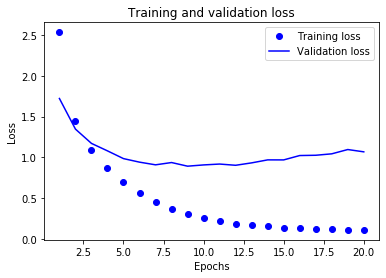

In [17]:
# 7. 绘制训练损失和验证损失：
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend()
plt.show()

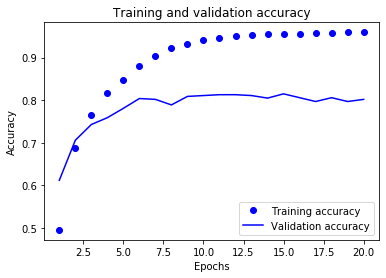

In [18]:
# 8. 绘制训练损精度和验证精度：
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.legend()
# plt.show()

In [19]:
# 9. 微调超参数epochs（由上两图可知第10轮之后模型开始过拟合），然后重新训练模型：
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, t_train, epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 8982 samples, validate on 1000 samples
Epoch 1/10


 512/8982 [>.............................] - ETA: 6s - loss: 3.8062 - acc: 0.0156

1024/8982 [==>...........................] - ETA: 3s - loss: 3.6890 - acc: 0.1729

1536/8982 [====>.........................] - ETA: 2s - loss: 3.5746 - acc: 0.2546

2048/8982 [=====>........................] - ETA: 2s - loss: 3.4625 - acc: 0.3032



2560/8982 [=======>......................] - ETA: 1s - loss: 3.3542 - acc: 0.3523

3072/8982 [=========>....................] - ETA: 1s - loss: 3.2552 - acc: 0.3812



3584/8982 [==========>...................] - ETA: 1s - loss: 3.1626 - acc: 0.4023



4096/8982 [============>.................] - ETA: 1s - loss: 3.0673 - acc: 0.4263

4608/8982 [==============>...............] - ETA: 0s - loss: 2.9841 - acc: 0.4360

5120/8982 [================>.............] - ETA: 0s - loss: 2.9003 - acc: 0.4541

5632/8982 [=================>............] - ETA: 0s - loss: 2.8280 - acc: 0.4670



6144/8982 [===================>..........] - ETA: 0s - loss: 2.7549 - acc: 0.4808



6656/8982 [=====================>........] - ETA: 0s - loss: 2.6915 - acc: 0.4916



7168/8982 [======================>.......] - ETA: 0s - loss: 2.6290 - acc: 0.5025



7680/8982 [========================>.....] - ETA: 0s - loss: 2.5701 - acc: 0.5141



8192/8982 [==========================>...] - ETA: 0s - loss: 2.5123 - acc: 0.5237

8704/8982 [============================>.] - ETA: 0s - loss: 2.4625 - acc: 0.5312

8982/8982 [==============================] - 2s 179us/step - loss: 2.4437 - acc: 0.5332 - val_loss: 1.5163 - val_acc: 0.6780


Epoch 2/10


 512/8982 [>.............................] - ETA: 1s - loss: 1.5003 - acc: 0.6797

1024/8982 [==>...........................] - ETA: 1s - loss: 1.5095 - acc: 0.6816

1536/8982 [====>.........................] - ETA: 0s - loss: 1.5359 - acc: 0.6803

2048/8982 [=====>........................] - ETA: 0s - loss: 1.5484 - acc: 0.6748

2560/8982 [=======>......................] - ETA: 0s - loss: 1.5258 - acc: 0.6789

3072/8982 [=========>....................]

 - ETA: 0s - loss: 1.4942 - acc: 0.6859

3584/8982 [==========>...................] - ETA: 0s - loss: 1.4819 - acc: 0.6855

4096/8982 [============>.................] - ETA: 0s - loss: 1.4653 - acc: 0.6882



4608/8982 [==============>...............] - ETA: 0s - loss: 1.4460 - acc: 0.6916



5120/8982 [================>.............] - ETA: 0s - loss: 1.4231 - acc: 0.6965

5632/8982 [=================>............] - ETA: 0s - loss: 1.4063 - acc: 0.6999

6144/8982 [===================>..........] - ETA: 0s - loss: 1.3873 - acc: 0.7049

6656/8982 [=====================>........] - ETA: 0s - loss: 1.3712 - acc: 0.7075



7168/8982 [======================>.......] - ETA: 0s - loss: 1.3617 - acc: 0.7093



7680/8982 [========================>.....] - ETA: 0s - loss: 1.3457 - acc: 0.7125



8192/8982 [==========================>...] - ETA: 0s - loss: 1.3378 - acc: 0.7131



8704/8982 [============================>.] - ETA: 0s - loss: 1.3268 - acc: 0.7159



8982/8982 [==============================] - 1s 130us/step - loss: 1.3241 - acc: 0.7161 - val_loss: 1.0344 - val_acc: 0.7680


Epoch 3/10
 512/8982 [>.............................] - ETA: 0s - loss: 1.0218 - acc: 0.7812

1024/8982 [==>...........................] - ETA: 0s - loss: 1.0635 - acc: 0.7676



1536/8982 [====>.........................] - ETA: 0s - loss: 1.0698 - acc: 0.7656

2048/8982 [=====>........................] - ETA: 0s - loss: 1.0565 - acc: 0.7666

2560/8982 [=======>......................] - ETA: 0s - loss: 1.0570 - acc: 0.7637



3072/8982 [=========>....................] - ETA: 0s - loss: 1.0406 - acc: 0.7708



3584/8982 [==========>...................] - ETA: 0s - loss: 1.0367 - acc: 0.7718



4096/8982 [============>.................] - ETA: 0s - loss: 1.0336 - acc: 0.7737



4608/8982 [==============>...............] - ETA: 0s - loss: 1.0287 - acc: 0.7739



5120/8982 [================>.............] - ETA: 0s - loss: 1.0138 - acc: 0.7777

5632/8982 [=================>............] - ETA: 0s - loss: 1.0068 - acc: 0.7779



6144/8982 [===================>..........] - ETA: 0s - loss: 1.0036 - acc: 0.7790

6656/8982 [=====================>........] - ETA: 0s - loss: 0.9970 - acc: 0.7809

7168/8982 [======================>.......] - ETA: 0s - loss: 0.9943 - acc: 0.7821

7680/8982 [========================>.....] - ETA: 0s - loss: 0.9877 - acc: 0.7842

8192/8982 [==========================>...] - ETA: 0s - loss: 0.9836 - acc: 0.7855



8704/8982 [============================>.] - ETA: 0s - loss: 0.9771 - acc: 0.7868

8982/8982 [==============================] - 1s 133us/step - loss: 0.9744 - acc: 0.7869 - val_loss: 0.7680 - val_acc: 0.8390


Epoch 4/10


 512/8982 [>.............................] - ETA: 1s - loss: 0.7256 - acc: 0.8555

1024/8982 [==>...........................] - ETA: 0s - loss: 0.7838 - acc: 0.8320



1536/8982 [====>.........................] - ETA: 0s - loss: 0.7747 - acc: 0.8307

2048/8982 [=====>........................] - ETA: 0s - loss: 0.7810 - acc: 0.8325



2560/8982 [=======>......................] - ETA: 0s - loss: 0.7825 - acc: 0.8332

3072/8982 [=========>....................] - ETA: 0s - loss: 0.7767 - acc: 0.8346

3584/8982 [==========>...................] - ETA: 0s - loss: 0.7728 - acc: 0.8345

4096/8982 [============>.................] - ETA: 0s - loss: 0.7784 - acc: 0.8328



4608/8982 [==============>...............] - ETA: 0s - loss: 0.7748 - acc: 0.8340

5120/8982 [================>.............] - ETA: 0s - loss: 0.7669 - acc: 0.8367

5632/8982 [=================>............] - ETA: 0s - loss: 0.7624 - acc: 0.8374

6144/8982 [===================>..........] - ETA: 0s - loss: 0.7498 - acc: 0.8416



6656/8982 [=====================>........] - ETA: 0s - loss: 0.7586 - acc: 0.8394



7168/8982 [======================>.......] - ETA: 0s - loss: 0.7610 - acc: 0.8382



7680/8982 [========================>.....] - ETA: 0s - loss: 0.7518 - acc: 0.8404

8192/8982 [==========================>...] - ETA: 0s - loss: 0.7589 - acc: 0.8389

8704/8982 [============================>.] - ETA: 0s - loss: 0.7561 - acc: 0.8397

8982/8982 [==============================] - 1s 134us/step - loss: 0.7565 - acc: 0.8390 - val_loss: 0.5781 - val_acc: 0.8850


Epoch 5/10


 512/8982 [>.............................] - ETA: 1s - loss: 0.6458 - acc: 0.8672

1024/8982 [==>...........................] - ETA: 1s - loss: 0.6049 - acc: 0.8838

1536/8982 [====>.........................] - ETA: 0s - loss: 0.6312 - acc: 0.8711



2048/8982 [=====>........................] - ETA: 0s - loss: 0.6260 - acc: 0.8740

2560/8982 [=======>......................] - ETA: 0s - loss: 0.6409 - acc: 0.8711

3072/8982 [=========>....................] - ETA: 0s - loss: 0.6300 - acc: 0.8721

3584/8982 [==========>...................] - ETA: 0s - loss: 0.6278 - acc: 0.8728

4096/8982 [============>.................] - ETA: 0s - loss: 0.6184 - acc: 0.8745

4608/8982 [==============>...............] - ETA: 0s - loss: 0.6121 - acc: 0.8752

5120/8982 [================>.............] - ETA: 0s - loss: 0.6162 - acc: 0.8746



5632/8982 [=================>............] - ETA: 0s - loss: 0.6153 - acc: 0.8746



6144/8982 [===================>..........] - ETA: 0s - loss: 0.6047 - acc: 0.8771



6656/8982 [=====================>........] - ETA: 0s - loss: 0.6068 - acc: 0.8764



7168/8982 [======================>.......] - ETA: 0s - loss: 0.6061 - acc: 0.8765



7680/8982 [========================>.....] - ETA: 0s - loss: 0.6020 - acc: 0.8763



8192/8982 [==========================>...] - ETA: 0s - loss: 0.6026 - acc: 0.8757



8704/8982 [============================>.] - ETA: 0s - loss: 0.5986 - acc: 0.8764

8982/8982 [==============================] - 1s 143us/step - loss: 0.5963 - acc: 0.8764 - val_loss: 0.4485 - val_acc: 0.9160


Epoch 6/10


 512/8982 [>.............................] - ETA: 0s - loss: 0.4582 - acc: 0.8984

1024/8982 [==>...........................] - ETA: 0s - loss: 0.4569 - acc: 0.9023



1536/8982 [====>.........................] - ETA: 0s - loss: 0.4418 - acc: 0.9049



2048/8982 [=====>........................] - ETA: 0s - loss: 0.4706 - acc: 0.8984



2560/8982 [=======>......................] - ETA: 0s - loss: 0.4787 - acc: 0.8934



3072/8982 [=========>....................] - ETA: 0s - loss: 0.4750 - acc: 0.8971

3584/8982 [==========>...................] - ETA: 0s - loss: 0.4714 - acc: 0.8993

4096/8982 [============>.................] - ETA: 0s - loss: 0.4581 - acc: 0.9036

4608/8982 [==============>...............] - ETA: 0s - loss: 0.4634 - acc: 0.9021



5120/8982 [================>.............] - ETA: 0s - loss: 0.4682 - acc: 0.8992



5632/8982 [=================>............] - ETA: 0s - loss: 0.4732 - acc: 0.8988

6144/8982 [===================>..........] - ETA: 0s - loss: 0.4749 - acc: 0.8993

6656/8982 [=====================>........] - ETA: 0s - loss: 0.4701 - acc: 0.9004



7168/8982 [======================>.......] - ETA: 0s - loss: 0.4707 - acc: 0.8994



7680/8982 [========================>.....] - ETA: 0s - loss: 0.4712 - acc: 0.9000



8192/8982 [==========================>...] - ETA: 0s - loss: 0.4706 - acc: 0.9006



8704/8982 [============================>.] - ETA: 0s - loss: 0.4727 - acc: 0.9011



8982/8982 [==============================] - 1s 131us/step - loss: 0.4751 - acc: 0.9009 - val_loss: 0.3708 - val_acc: 0.9390


Epoch 7/10


 512/8982 [>.............................] - ETA: 0s - loss: 0.4365 - acc: 0.9082

1024/8982 [==>...........................] - ETA: 0s - loss: 0.3853 - acc: 0.9209



1536/8982 [====>.........................] - ETA: 0s - loss: 0.3967 - acc: 0.9160



2048/8982 [=====>........................] - ETA: 0s - loss: 0.3918 - acc: 0.9194



2560/8982 [=======>......................] - ETA: 0s - loss: 0.3901 - acc: 0.9195



3072/8982 [=========>....................] - ETA: 0s - loss: 0.3857 - acc: 0.9206



3584/8982 [==========>...................] - ETA: 0s - loss: 0.3825 - acc: 0.9208



4096/8982 [============>.................] - ETA: 0s - loss: 0.3739 - acc: 0.9231

4608/8982 [==============>...............] - ETA: 0s - loss: 0.3787 - acc: 0.9208



5120/8982 [================>.............] - ETA: 0s - loss: 0.3820 - acc: 0.9186

5632/8982 [=================>............] - ETA: 0s - loss: 0.3788 - acc: 0.9189



6144/8982 [===================>..........] - ETA: 0s - loss: 0.3818 - acc: 0.9168



6656/8982 [=====================>........] - ETA: 0s - loss: 0.3796 - acc: 0.9181

7168/8982 [======================>.......] - ETA: 0s - loss: 0.3806 - acc: 0.9188



7680/8982 [========================>.....] - ETA: 0s - loss: 0.3837 - acc: 0.9176



8192/8982 [==========================>...] - ETA: 0s - loss: 0.3828 - acc: 0.9175



8704/8982 [============================>.] - ETA: 0s - loss: 0.3825 - acc: 0.9179

8982/8982 [==============================] - 1s 133us/step - loss: 0.3831 - acc: 0.9175 - val_loss: 0.2823 - val_acc: 0.9530


Epoch 8/10


 512/8982 [>.............................] - ETA: 1s - loss: 0.2959 - acc: 0.9473

1024/8982 [==>...........................] - ETA: 1s - loss: 0.3328 - acc: 0.9355

1536/8982 [====>.........................] - ETA: 0s - loss: 0.3266 - acc: 0.9342



2048/8982 [=====>........................] - ETA: 0s - loss: 0.3180 - acc: 0.9346



2560/8982 [=======>......................] - ETA: 0s - loss: 0.3182 - acc: 0.9336



3072/8982 [=========>....................] - ETA: 0s - loss: 0.3174 - acc: 0.9352

3584/8982 [==========>...................] - ETA: 0s - loss: 0.3156 - acc: 0.9369

4096/8982 [============>.................] - ETA: 0s - loss: 0.3104 - acc: 0.9382

4608/8982 [==============>...............] - ETA: 0s - loss: 0.3049 - acc: 0.9377



5120/8982 [================>.............] - ETA: 0s - loss: 0.3060 - acc: 0.9367



5632/8982 [=================>............] - ETA: 0s - loss: 0.3046 - acc: 0.9368



6144/8982 [===================>..........] - ETA: 0s - loss: 0.3067 - acc: 0.9360



6656/8982 [=====================>........] - ETA: 0s - loss: 0.3084 - acc: 0.9358



7168/8982 [======================>.......] - ETA: 0s - loss: 0.3125 - acc: 0.9347



7680/8982 [========================>.....] - ETA: 0s - loss: 0.3157 - acc: 0.9332

8192/8982 [==========================>...] - ETA: 0s - loss: 0.3096 - acc: 0.9340



8704/8982 [============================>.] - ETA: 0s - loss: 0.3089 - acc: 0.9344



8982/8982 [==============================] - 1s 131us/step - loss: 0.3076 - acc: 0.9348 - val_loss: 0.2312 - val_acc: 0.9560


Epoch 9/10


 512/8982 [>.............................] - ETA: 0s - loss: 0.2455 - acc: 0.9492

1024/8982 [==>...........................] - ETA: 0s - loss: 0.2262 - acc: 0.9502



1536/8982 [====>.........................] - ETA: 0s - loss: 0.2389 - acc: 0.9447



2048/8982 [=====>........................] - ETA: 0s - loss: 0.2441 - acc: 0.9438



2560/8982 [=======>......................] - ETA: 0s - loss: 0.2490 - acc: 0.9441



3072/8982 [=========>....................] - ETA: 0s - loss: 0.2481 - acc: 0.9456



3584/8982 [==========>...................] - ETA: 0s - loss: 0.2584 - acc: 0.9442



4096/8982 [============>.................] - ETA: 0s - loss: 0.2555 - acc: 0.9448

4608/8982 [==============>...............] - ETA: 0s - loss: 0.2631 - acc: 0.9425



5120/8982 [================>.............] - ETA: 0s - loss: 0.2616 - acc: 0.9428

5632/8982 [=================>............] - ETA: 0s - loss: 0.2610 - acc: 0.9430

6144/8982 [===================>..........] - ETA: 0s - loss: 0.2611 - acc: 0.9425

6656/8982 [=====================>........] - ETA: 0s - loss: 0.2592 - acc: 0.9426



7168/8982 [======================>.......] - ETA: 0s - loss: 0.2610 - acc: 0.9414



7680/8982 [========================>.....] - ETA: 0s - loss: 0.2626 - acc: 0.9405

8192/8982 [==========================>...] - ETA: 0s - loss: 0.2623 - acc: 0.9403



8704/8982 [============================>.] - ETA: 0s - loss: 0.2610 - acc: 0.9409

8982/8982 [==============================] - 1s 131us/step - loss: 0.2591 - acc: 0.9414 - val_loss: 0.1900 - val_acc: 0.9640


Epoch 10/10


 512/8982 [>.............................] - ETA: 0s - loss: 0.1657 - acc: 0.9746

1024/8982 [==>...........................] - ETA: 0s - loss: 0.1843 - acc: 0.9609

1536/8982 [====>.........................] - ETA: 0s - loss: 0.1896 - acc: 0.9603



2048/8982 [=====>........................] - ETA: 0s - loss: 0.1923 - acc: 0.9585

2560/8982 [=======>......................] - ETA: 0s - loss: 0.1966 - acc: 0.9563

3072/8982 [=========>....................] - ETA: 0s - loss: 0.2089 - acc: 0.9518

3584/8982 [==========>...................] - ETA: 0s - loss: 0.2110 - acc: 0.9520

4096/8982 [============>.................] - ETA: 0s - loss: 0.2096 - acc: 0.9517

4608/8982 [==============>...............] - ETA: 0s - loss: 0.2053 - acc: 0.9538



5120/8982 [================>.............] - ETA: 0s - loss: 0.2068 - acc: 0.9531

5632/8982 [=================>............] - ETA: 0s - loss: 0.2093 - acc: 0.9521

6144/8982 [===================>..........] - ETA: 0s - loss: 0.2094 - acc: 0.9518



6656/8982 [=====================>........] - ETA: 0s - loss: 0.2109 - acc: 0.9510

7168/8982 [======================>.......] - ETA: 0s - loss: 0.2134 - acc: 0.9502



7680/8982 [========================>.....] - ETA: 0s - loss: 0.2155 - acc: 0.9490

8192/8982 [==========================>...] - ETA: 0s - loss: 0.2180 - acc: 0.9473



8704/8982 [============================>.] - ETA: 0s - loss: 0.2220 - acc: 0.9465



8982/8982 [==============================] - 1s 127us/step - loss: 0.2221 - acc: 0.9462 - val_loss: 0.1753 - val_acc: 0.9650


In [20]:
# 10. 评估模型：
results = model.evaluate(x_test, t_test)
print(results)

  32/2246 [..............................] - ETA: 0s

 480/2246 [=====>........................] - ETA: 0s

 992/2246 [============>.................] - ETA: 0s

1472/2246 [==================>...........] - ETA: 0s

1984/2246 [=========================>....] - ETA: 0s



2246/2246 [==============================] - 0s 110us/step


[0.995035513107626, 0.7956366874443455]


In [21]:
# 11. 在测试集上生成预测结果：
predictions = model.predict(x_test)
predictions.shape

(2246, 46)

In [22]:
np.sum(predictions[0])

1.0000001

In [23]:
# 查看第一条新闻文本的主题分类：
np.argmax(predictions[0])  # 主题为利润

3

In [24]:
t_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float16)

In [25]:
# 将第1条新闻文本的索引解码成新闻文本：
word_index = reuters.get_word_index()
index_word = {i: w for w, i in word_index.items()}
decoded_newswire = ' '.join(index_word.get(i - 3, '?') for i in test_data[0])

In [26]:
decoded_newswire

'? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3'

In [27]:
# 以上文本的谷歌翻译结果如下：
# ？ 伟大的大西洋和太平洋茶叶公司称其三年345百万英镑的资本计划将大幅增加至？ 增长
# 和扩张计划？ 公司和？ 公司未来两年a和p表示收购？ 在1986年8月和？ 在截至12月28日
# 的第四季度，由于销售额增长48％，达到1580亿美元，其持续经营业务的净收入在最近一个
# 季度增长了526％，达到2070万桶，每股收益55个基点，帮助我们实现了好于预期的业绩。 
# dlrs a和p没有提供有关扩展资本计划的详细信息，但确实说它在1986年a期间完成了该计划
# 的第一年，并且p是52所拥有的p 4？？ 西德路透社3

In [28]:
# 46个主题标签如下：
# 数据来源：https://github.com/keras-team/keras/issues/12072
{"reuters":
  ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead'],}

{'reuters': ['cocoa',
  'grain',
  'veg-oil',
  'earn',
  'acq',
  'wheat',
  'copper',
  'housing',
  'money-supply',
  'coffee',
  'sugar',
  'trade',
  'reserves',
  'ship',
  'cotton',
  'carcass',
  'crude',
  'nat-gas',
  'cpi',
  'money-fx',
  'interest',
  'gnp',
  'meal-feed',
  'alum',
  'oilseed',
  'gold',
  'tin',
  'strategic-metal',
  'livestock',
  'retail',
  'ipi',
  'iron-steel',
  'rubber',
  'heat',
  'jobs',
  'lei',
  'bop',
  'zinc',
  'orange',
  'pet-chem',
  'dlr',
  'gas',
  'silver',
  'wpi',
  'hog',
  'lead']}

In [29]:
# 查看第20条新闻的主题：
np.argmax(predictions[119])  # 主题为收购

4

In [30]:
# 将第10条新闻文本的索引解码成新闻文本：
word_index = reuters.get_word_index()
index_word = {i: w for w, i in word_index.items()}
decoded_newswire = ' '.join(index_word.get(i - 3, '?') for i in test_data[119])

In [31]:
decoded_newswire

'? ? inc said it has completed the acquisition of lt american ? corp and its us ? subsidiary which provide long distance telephone service in northeast florida terms were not disclosed ? shareholders include norfolk southern corp lt nsc m a ? inc lt ? centel corp lt cnt ? corp lt at and e f hutton group inc lt ? reuter 3'